In [2]:
from tensorflow import keras
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

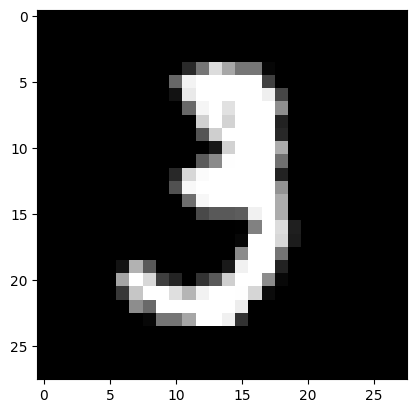

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10],cmap='gray')
plt.show()

# Preprocessing

In [10]:
x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255
x_test = x_test.reshape((-1,28,28,1)).astype('float32') / 255

In [11]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Model Definition

In [14]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides = (1,1),padding = 'valid' , activation = 'relu' , input_shape = (28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=10,activation='softmax'))

c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
import tensorflow as tf
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])


In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,770,634 (10.57 MB)

 Trainable params: 2,770,634 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
hist = model.fit(x_train,y_train,epochs=10,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.3943 - loss: 1.9258 - val_accuracy: 0.6952 - val_loss: 66.0867
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8664 - loss: 0.4839 - val_accuracy: 0.7944 - val_loss: 59.1257
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8950 - loss: 0.3627 - val_accuracy: 0.8497 - val_loss: 48.3644
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9086 - loss: 0.3142 - val_accuracy: 0.8767 - val_loss: 43.0816
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9178 - loss: 0.2857 - val_accuracy: 0.8989 - val_loss: 37.8138
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9235 - loss: 0.2630 - val_accuracy: 0.9107 - val_loss: 35.0023
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9282 - loss: 0.2444 - val_accuracy: 0.9143 - val_loss: 33.9829
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9374 - loss: 0.2132 - 

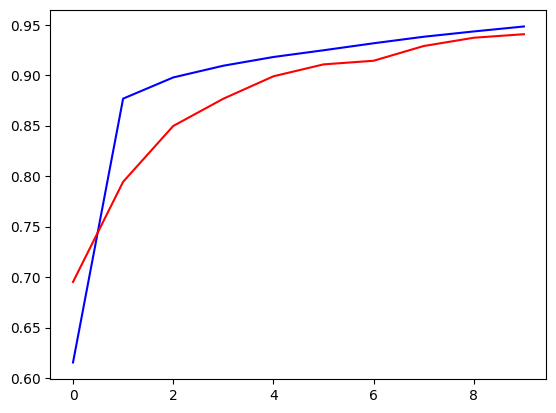

In [23]:
plt.plot(hist.history['accuracy'],color = 'blue')
plt.plot(hist.history['val_accuracy'],color = 'red')